In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
yelp['text length'] = yelp['text'].apply(len)

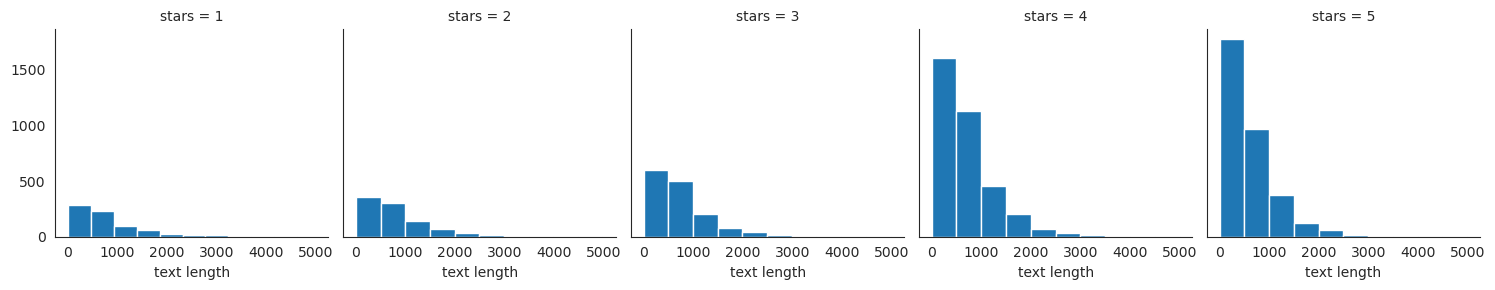

In [6]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length')

/tmp/ipykernel_156006/468530455.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')


<Axes: xlabel='stars', ylabel='text length'>

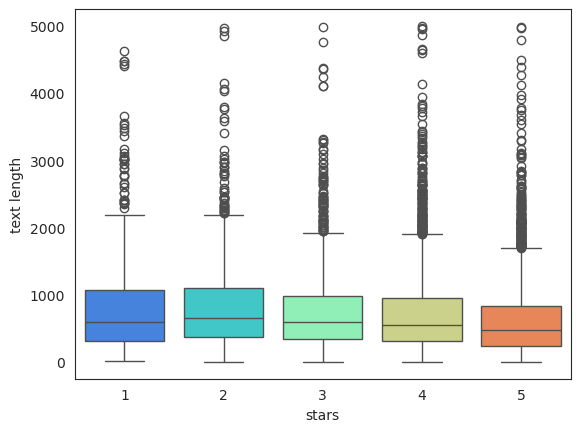

In [7]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

/tmp/ipykernel_156006/2116447000.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars',data=yelp,palette='rainbow')


<Axes: xlabel='stars', ylabel='count'>

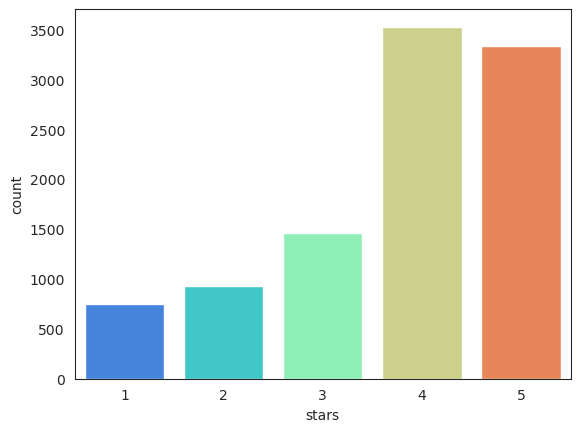

In [8]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [9]:
stars = yelp.groupby('stars').mean(numeric_only=True)
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [10]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

yelp_class = yelp[(yelp.stars == 1) | (yelp.stars == 5)]
X = yelp_class['text']
y = yelp_class['stars']

cv = CountVectorizer()
X = cv.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[159  69]
 [ 22 976]]
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226

0.9257748776508973


In [17]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [19]:
pred = pipeline.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226

0.8140293637846656


/home/amir-daneshmand/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/amir-daneshmand/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/amir-daneshmand/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [21]:
X = yelp['text']
y = yelp['stars']

cv = CountVectorizer()
X = cv.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)

In [23]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[ 57  35  12  79  37]
 [ 12  20  33 180  28]
 [  6   8  36 350  43]
 [  6   4  21 775 258]
 [  5   5   9 446 535]]
              precision    recall  f1-score   support

           1       0.66      0.26      0.37       220
           2       0.28      0.07      0.12       273
           3       0.32      0.08      0.13       443
           4       0.42      0.73      0.54      1064
           5       0.59      0.54      0.56      1000

    accuracy                           0.47      3000
   macro avg       0.46      0.34      0.34      3000
weighted avg       0.47      0.47      0.43      3000

0.47433333333333333


In [24]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

X = yelp['text']
y = yelp['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [25]:
pred = pipeline.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[  0   0   0 187  33]
 [  0   0   0 266   7]
 [  0   0   1 422  20]
 [  0   0   0 974  90]
 [  0   0   0 708 292]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       220
           2       0.00      0.00      0.00       273
           3       1.00      0.00      0.00       443
           4       0.38      0.92      0.54      1064
           5       0.66      0.29      0.40      1000

    accuracy                           0.42      3000
   macro avg       0.41      0.24      0.19      3000
weighted avg       0.50      0.42      0.33      3000

0.42233333333333334


/home/amir-daneshmand/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/amir-daneshmand/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/amir-daneshmand/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif